<a href="https://colab.research.google.com/github/0x6f736f646f/computer-vision-ai-saturdays/blob/master/3rdMonth%7Bdeep_learning%7D/Notebook/03-using-pretrained-net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Using Pre-Trained Models

You will load in the VGG and ResNet models.  You will then use your laptop camera to take a picture.  Then you will run your picture through these models to see the results.


In [1]:
import warnings
warnings.filterwarnings("ignore")

from PIL import Image
from keras.preprocessing import image
from keras.applications import vgg16, resnet50, InceptionV3 
import numpy as np
import pandas as pd

import cv2
import matplotlib.pyplot as plt

%matplotlib inline

Using TensorFlow backend.


In [2]:
def get_image(camera):
    retval, im = camera.read()
    return im

In [3]:
def save_webcam_image(img_path):

    try:
        ramp_frames = 10
    
        camera = cv2.VideoCapture(0)

        for i in range(ramp_frames):
            retval, im_camera = camera.read()

        retval, im_camera = camera.read()

        im = cv2.resize(im_camera, (224, 224)).astype(np.float32)
        cv2.imwrite(img_path, im)
        del (camera)
        return True
    except ValueError as e:
        print("Image Capture Failed")
    return False

In [4]:
# img_path = "../Data/webcam_test_img.png"
img_path = "../Data/face.jpeg"
# if save_webcam_image(img_path) is False:
#     # Webcam not active, use the rocking chair Image
#     img_path = "../Data/face.jpeg"
#     print("Using the Test Rocking Chair Image: {}".format(img_path))

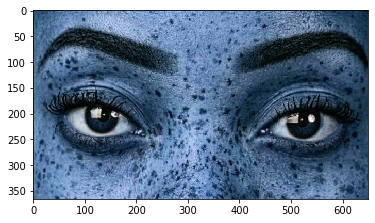

In [5]:
plt.imshow(cv2.imread(img_path))

## VGG16 - Pretrained Model

In [6]:
vgg16_model = vgg16.VGG16(weights='imagenet')
vgg16_model.summary()


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0    

In [7]:
# Utility Function to Load Image, Preprocess input and Targets
def predict_image(model, img_path, preprocess_input_fn, decode_predictions_fn, target_size=(224, 224)):

    img = image.load_img(img_path, target_size=target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input_fn(x)
    
    preds = model.predict(x)
    predictions_df = pd.DataFrame(decode_predictions_fn(preds, top=10)[0])
    predictions_df.columns = ["Predicted Class", "Name", "Probability"]
    return predictions_df

In [8]:
#img_path="rocking_chair.png"  ## Uncomment this and put the path to your file here if desired
# Predict Results
predict_image(vgg16_model, img_path, vgg16.preprocess_input, vgg16.decode_predictions)

,Predicted Class,Name,Probability
0,n03724870,mask,0.702951
1,n04372370,switch,0.031451
2,n03935335,piggy_bank,0.021928
3,n03874599,padlock,0.020146
4,n03388043,fountain,0.009292
5,n04229816,ski_mask,0.009197
6,n03532672,hook,0.007698
7,n04399382,teddy,0.005957
8,n04209239,shower_curtain,0.005004
9,n04005630,prison,0.004813


## Resnet50 - Pretrained Model

## Inception - Pretrained Model